In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
df = pd.read_csv('../../ArewaDS-Machine-Learning-Assignments/week6-cluster/nigerian-songs.csv')
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


Create a boxplot, calling boxplot() for each column:

<Axes: xlabel='release_date'>

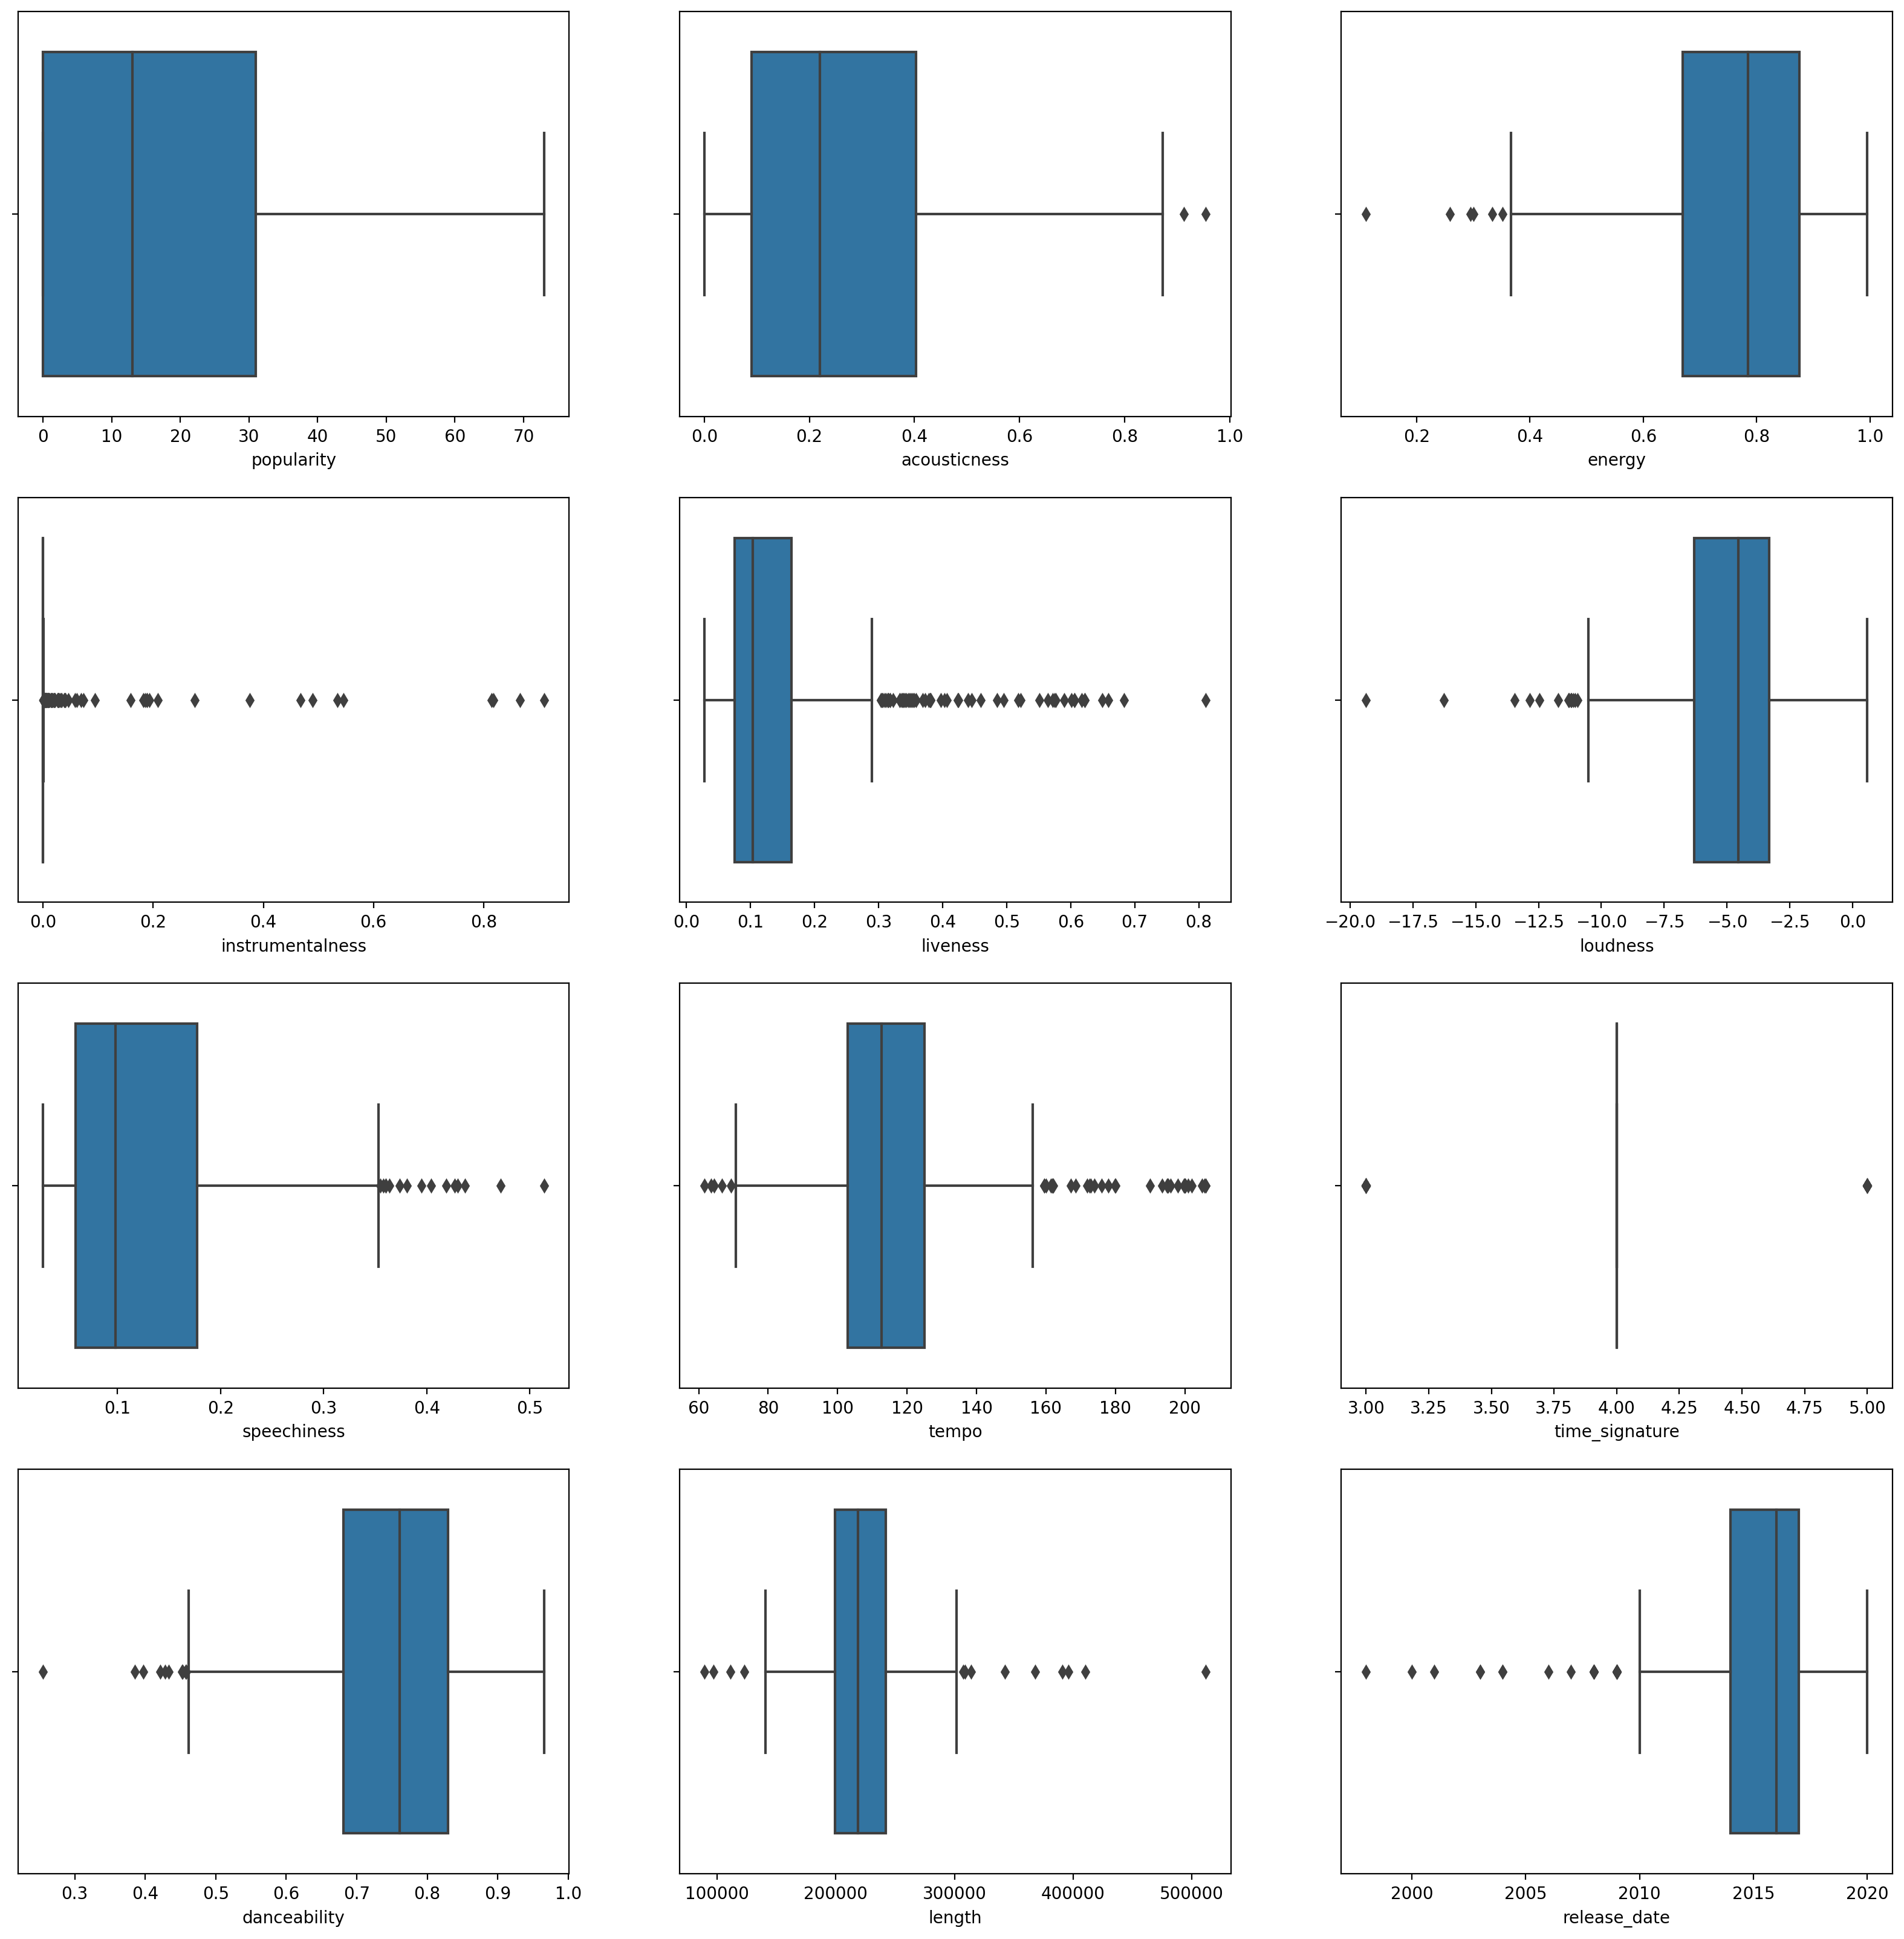

In [2]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

For now, choose which columns you will use for your clustering exercise. Pick ones with similar ranges and encode the artist_top_genre column as numeric data:

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)

Now you need to pick how many clusters to target. You know there are 3 song genres that we carved out of the dataset, so let's try 3

In [20]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


You see an array printed out with predicted clusters (0, 1,or 2) for each row of the dataframe.

Use this array to calculate a 'silhouette score':

In [8]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score


0.5918299843029218

***Silhouette score***

In [21]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

Use the 'elbow method' to make sure

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss.index, marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 49 out of 530 samples were correctly labeled.
Accuracy score: 0.09


Try the process again, this time setting three clusters, and display the clusters as a scatterplot:

c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


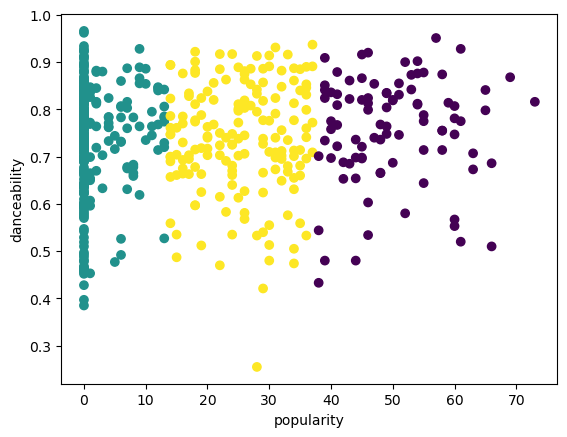

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

Check the model's accuracy:

In [18]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 49 out of 530 samples were correctly labeled.
Accuracy score: 0.09
